In [1]:
# Initialise packages 
from model import U2NET
import coremltools as ct
from coremltools.proto import FeatureTypes_pb2 as ft
import torch
import os
from PIL import Image
from torchvision import transforms
from skimage import io, transform
import numpy as np

In [2]:
# Re-open model for modification and append new output layers.
model = ct.models.MLModel("updated_model.mlmodel")

/opt/anaconda3/envs/u2net/lib/python3.7/site-packages/coremltools/models/model.py:118: RuntimeWarning: You will not be able to run predict() on this Core ML model. Underlying exception message was: Error compiling model: "Error reading protobuf spec. validator error: Layer 'out_p0' consumes an input named 'out_a0' which is not present in this network.".
  RuntimeWarning,


In [3]:
# Create a test input.

# Specify an image as input here
original_image = Image.open("test_data/test_images/0002-01.jpg")
display(input_image)

input_image = original_image.resize((320,320))
R, G, B = input_image.split()
input_image = Image.merge("RGB", (B, R, G))
display(input_image)
#input_image = np.asarray(input_image)
#print(input_image)

NameError: name 'input_image' is not defined

In [140]:
# Test our model.
out_dict = model.predict({'in_0': input_image})
print(len(out_dict))

7


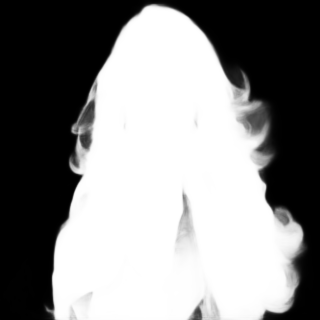

In [141]:
im = out_dict['out_p0']
im

(800, 657) (800, 657)


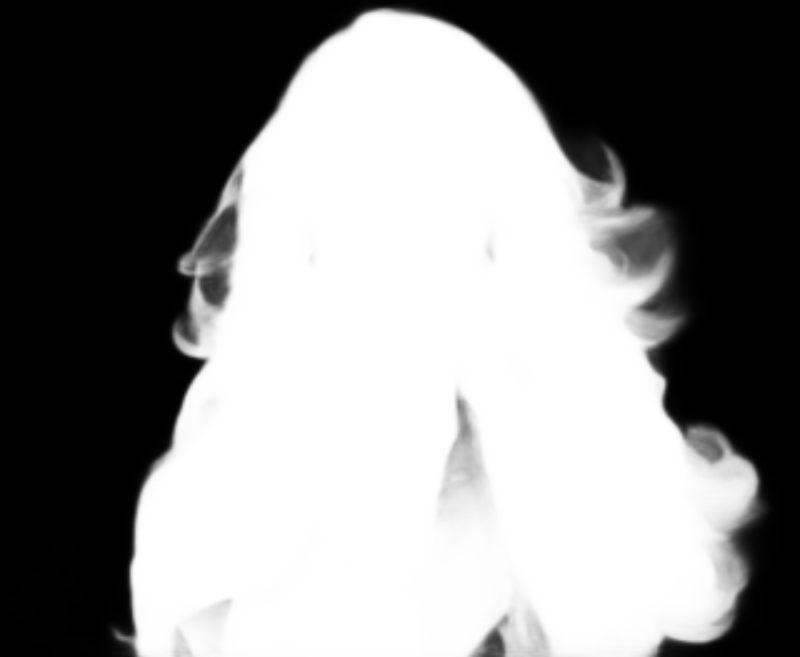

In [142]:
imo = im.resize((original_image.size[0],original_image.size[1]),resample=Image.BILINEAR)
print(original_image.size, imo.size)
imo